In [101]:
#standard ds imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#import data
from vega_datasets import data

#time series import
import datetime

In [102]:
# getting our data to answer our first set of questions and asigning it to a variable 
df= data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [103]:
# making sure that the data types are correct 
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [104]:
# checking for null values
df.isna().sum()

temp    0
date    0
dtype: int64

In [105]:
df= df.set_index('date')

# Datetime Exercises

## Resample by the day and take the average temperature. Visualize the average temperature over time.

<AxesSubplot:xlabel='date'>

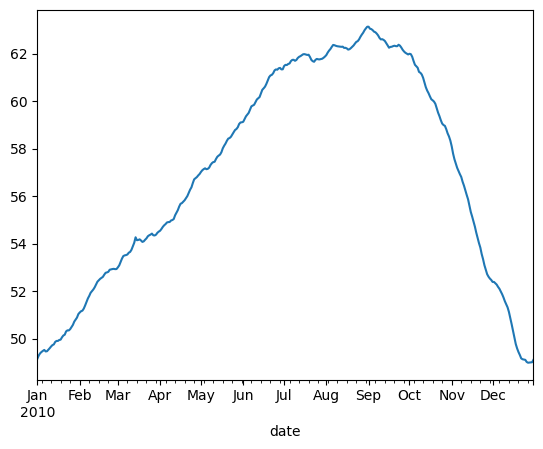

In [106]:
df.resample('D').mean()['temp'].plot()

## Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

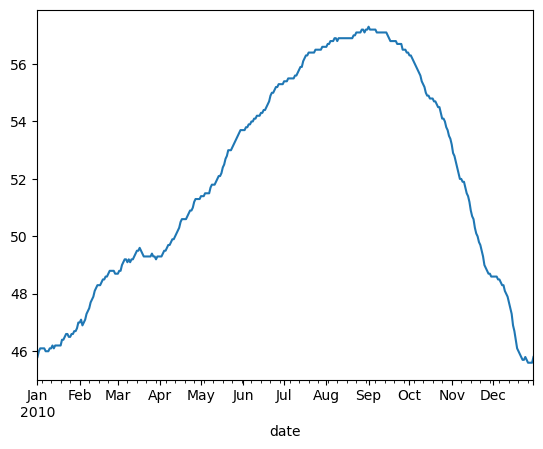

In [107]:
df.resample('D').min()['temp'].plot()

## Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

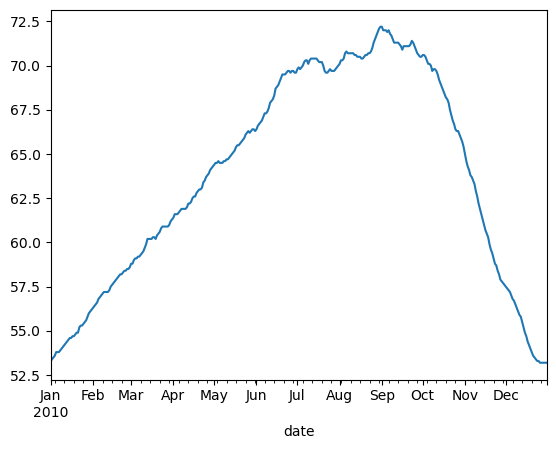

In [108]:
df.resample('D').max()['temp'].plot()

## Which month is the coldest, on average?

In [109]:
df.resample('M').mean()['temp'].min(), 

(49.98413978494623,)

## Which month has the highest average temperature?

In [111]:
df.temp.resample('M').mean().sort_values(ascending=False)

date
2010-09-30    62.487083
2010-08-31    62.405376
2010-07-31    61.765457
2010-06-30    60.444722
2010-10-31    60.253091
2010-05-31    57.970968
2010-04-30    55.633056
2010-11-30    55.185139
2010-03-31    53.956528
2010-02-28    52.243899
2010-12-31    50.498253
2010-01-31    49.984140
Name: temp, dtype: float64

In [112]:
df.temp.resample('M').mean().sort_values().tail(1)

date
2010-09-30    62.487083
Name: temp, dtype: float64

## Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [114]:
daily_df = df.temp.resample('D').agg(['min', 'max'])
daily_df

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8
...,...,...
2010-12-27,45.6,53.2
2010-12-28,45.6,53.2
2010-12-29,45.6,53.2


In [118]:
daily_df['temp_diff'] = daily_df['max'] - daily_df['min']
daily_df

,min,max,temp_diff
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


In [119]:
#sort the values to see temp difference to answer question
daily_df.temp_diff.resample('M').max().sort_values(ascending=False)

date
2010-08-31    15.0
2010-09-30    14.9
2010-06-30    14.8
2010-07-31    14.8
2010-10-31    14.4
2010-05-31    13.1
2010-04-30    13.0
2010-03-31    12.0
2010-11-30    11.8
2010-02-28     9.9
2010-01-31     9.3
2010-12-31     8.9
Name: temp_diff, dtype: float64

## Set 2 of Exercises

In [122]:
df= data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [123]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [124]:
df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [125]:
df= df.set_index('date')
df.head(1)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle


## Which year and month combination has the highest amount of precipitation?

In [127]:
df.precipitation.resample('M').mean().sort_values(ascending=False)

date
2015-12-31    9.177419
2014-03-31    7.741935
2015-11-30    7.086667
2012-11-30    7.016667
2012-03-31    5.903226
2012-12-31    5.612903
2012-01-31    5.590323
2014-02-28    5.542857
2014-10-31    5.532258
2012-10-31    5.493548
2013-09-30    5.226667
2013-04-30    4.986667
2015-02-28    4.792857
2014-11-30    4.103333
2015-10-31    3.948387
2014-12-31    3.929032
2015-03-31    3.661290
2014-04-30    3.536667
2013-01-31    3.409677
2013-11-30    3.210000
2012-02-29    3.182759
2014-01-31    3.032258
2015-01-31    3.000000
2015-08-31    2.687097
2014-05-31    2.580645
2012-06-30    2.503333
2012-04-30    2.270000
2013-03-31    2.248387
2013-05-31    1.951613
2014-09-30    1.890000
2015-04-30    1.720000
2012-05-31    1.683871
2014-08-31    1.483871
2013-02-28    1.439286
2013-12-31    1.367742
2013-10-31    1.264516
2013-08-31    1.109677
2013-06-30    1.103333
2012-07-31    0.848387
2015-09-30    0.703333
2014-07-31    0.632258
2014-06-30    0.626667
2015-05-31    0.477419
2015-0

In [128]:
df.precipitation.sort_values(ascending=False).head(1)

date
2015-03-15    55.9
Name: precipitation, dtype: float64

## Visualize the amount of monthly precipitation over time.

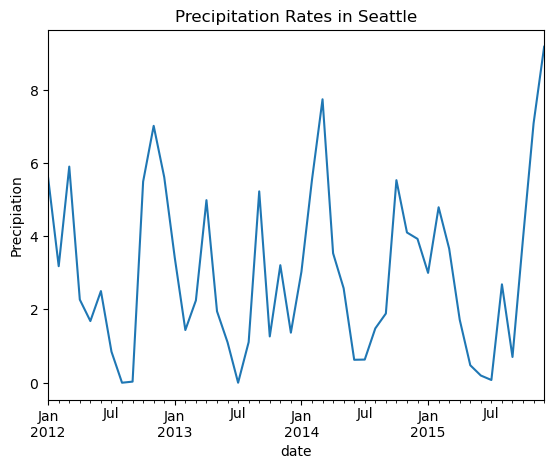

In [129]:
df.precipitation.resample('M').mean().plot()
plt.title('Precipitation Rates in Seattle')
plt.ylabel('Precipiation')
plt.show()

## Visualize the amount of wind over time. Choose a time interval you think is appropriate.

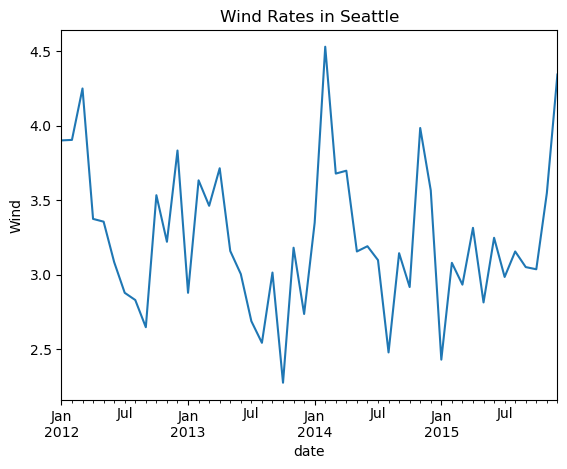

In [130]:
df.wind.resample('M').mean().plot()
plt.title('Wind Rates in Seattle')
plt.ylabel('Wind')
plt.show()


## Which year-month combination is the windiest?

In [131]:
df.wind.sort_values(ascending=False).head(1)

date
2012-12-17    9.5
Name: wind, dtype: float64

## What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [133]:
df['sunny_day'] = df.weather == 'sun'

In [134]:
df.sunny_day.resample('Y').sum().sort_values(ascending=False)

date
2014-12-31    211
2013-12-31    205
2015-12-31    180
2012-12-31    118
Name: sunny_day, dtype: int64

In [135]:
df.sunny_day.resample('Y').mean().sort_values(ascending=False)

date
2014-12-31    0.578082
2013-12-31    0.561644
2015-12-31    0.493151
2012-12-31    0.322404
Name: sunny_day, dtype: float64

## In which month does it rain the most?

In [137]:
df['rainy_day'] = df.weather == 'rain'
df.head()

,precipitation,temp_max,temp_min,wind,weather,sunny_day,rainy_day
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False,True
2012-01-03,0.8,11.7,7.2,2.3,rain,False,True
2012-01-04,20.3,12.2,5.6,4.7,rain,False,True
2012-01-05,1.3,8.9,2.8,6.1,rain,False,True


In [138]:
df['month'] = df.index.month_name()

In [139]:
df.rainy_day.resample('M').sum().sort_values(ascending=False)

date
2012-11-30    25
2012-12-31    23
2013-02-28    23
2012-03-31    19
2012-04-30    19
2012-06-30    19
2013-03-31    18
2012-01-31    18
2012-10-31    17
2012-02-29    17
2013-01-31    16
2012-05-31    16
2012-07-31    12
2012-09-30     4
2012-08-31     2
2015-08-31     2
2013-10-31     1
2014-08-31     1
2014-07-31     1
2015-01-31     1
2015-04-30     1
2014-10-31     1
2013-08-31     1
2013-07-31     1
2015-10-31     1
2015-07-31     0
2015-06-30     0
2015-05-31     0
2015-03-31     0
2015-02-28     0
2014-11-30     0
2015-11-30     0
2014-12-31     0
2015-09-30     0
2014-01-31     0
2014-09-30     0
2014-06-30     0
2014-05-31     0
2014-04-30     0
2014-03-31     0
2014-02-28     0
2013-12-31     0
2013-11-30     0
2013-09-30     0
2013-06-30     0
2013-05-31     0
2013-04-30     0
2015-12-31     0
Name: rainy_day, dtype: int64

In [140]:
df.month.value_counts()

January      124
March        124
May          124
July         124
August       124
October      124
December     124
April        120
June         120
September    120
November     120
February     113
Name: month, dtype: int64

In [141]:
df.groupby('month').precipitation.sum().sort_values(ascending=False)

month
November     642.5
December     622.7
March        606.2
October      503.4
January      466.0
February     422.0
April        375.4
September    235.5
May          207.5
August       163.7
June         132.9
July          48.2
Name: precipitation, dtype: float64

In [143]:
df.groupby('month').rainy_day.sum().sort_values(ascending=False)

month
February     40
March        37
January      35
November     25
December     23
April        20
October      20
June         19
May          16
July         14
August        6
September     4
Name: rainy_day, dtype: int64

In [142]:
df.groupby('month').precipitation.mean().sort_values(ascending=False)

month
November     5.354167
December     5.021774
March        4.888710
October      4.059677
January      3.758065
February     3.734513
April        3.128333
September    1.962500
May          1.673387
August       1.320161
June         1.107500
July         0.388710
Name: precipitation, dtype: float64

## Which month has the most number of days with a non-zero amount of precipitation?

In [144]:
df.groupby('month').rainy_day.mean().sort_values(ascending=False)

month
February     0.353982
March        0.298387
January      0.282258
November     0.208333
December     0.185484
April        0.166667
October      0.161290
June         0.158333
May          0.129032
July         0.112903
August       0.048387
September    0.033333
Name: rainy_day, dtype: float64

In [146]:
df['precip_amnt'] = df.precipitation > 0
df.head()

,precipitation,temp_max,temp_min,wind,weather,sunny_day,rainy_day,month,precip_amnt
date,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,False,January,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False,True,January,True
2012-01-03,0.8,11.7,7.2,2.3,rain,False,True,January,True
2012-01-04,20.3,12.2,5.6,4.7,rain,False,True,January,True
2012-01-05,1.3,8.9,2.8,6.1,rain,False,True,January,True


In [147]:
df.groupby('month').precip_amnt.mean().sort_values(ascending=False)

month
December     0.653226
February     0.646018
November     0.591667
March        0.588710
January      0.532258
October      0.491935
April        0.491667
June         0.308333
September    0.291667
May          0.274194
August       0.177419
July         0.088710
Name: precip_amnt, dtype: float64

# Set 3 of Exercises

In [152]:
df= data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


## Convert any negative delays to 0.

In [153]:
df= df.set_index('date').sort_index()
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [155]:
df['delay'] = np.where(df['delay'] < 0, 0, df['delay'])
df.sample(5)

,delay,distance,origin,destination
date,,,,
2001-03-26 22:10:00,0,237,STL,MCI
2001-03-19 19:50:00,0,777,MDW,BDL
2001-01-26 17:50:00,102,188,RNO,SJC
2001-01-22 17:40:00,0,308,LAX,SJC
2001-01-10 11:40:00,0,967,BWI,MCI


## Which hour of the day has the highest average delay?

In [156]:
#Create an hour column
df['hour']= df.index.strftime('%H')
df.sample(3)

,delay,distance,origin,destination,hour
date,,,,,
2001-02-12 20:50:00,0,345,RNO,LAS,20
2001-02-22 14:30:00,17,447,SFO,SAN,14
2001-02-09 13:30:00,0,324,AMA,DAL,13


In [158]:
df.groupby('hour').delay.mean().sort_values(ascending=False).head(1)

hour
03    302.5
Name: delay, dtype: float64

In [159]:
df.groupby('hour').delay.mean().idxmax()

'03'

## Does the day of the week make a difference in the delay amount?

In [160]:
df.resample('D').delay.mean()

date
2001-01-01     8.747126
2001-01-02    21.808411
2001-01-03    17.150000
2001-01-04     7.176724
2001-01-05     9.294118
                ...    
2001-03-27     4.669683
2001-03-28     3.551282
2001-03-29    13.545455
2001-03-30     8.893162
2001-03-31     7.000000
Freq: D, Name: delay, Length: 90, dtype: float64

In [161]:
df['day']= df.index.day_name()
df.sample(5)

,delay,distance,origin,destination,hour,day
date,,,,,,
2001-01-03 18:40:00,14,293,DAL,LBB,18,Wednesday
2001-02-08 07:00:00,0,588,SLC,OAK,07,Thursday
2001-03-03 14:10:00,0,236,LAX,LAS,14,Saturday
2001-02-03 11:50:00,0,181,OKC,DAL,11,Saturday
2001-03-08 09:55:00,0,775,LAS,LBB,09,Thursday


In [162]:
weekday_df = df.groupby('day').delay.mean().sort_values(ascending=False)
weekday_df

day
Friday       17.757596
Thursday     12.821322
Wednesday    11.032478
Sunday       10.413542
Tuesday       9.410866
Saturday      8.431498
Monday        7.165772
Name: delay, dtype: float64

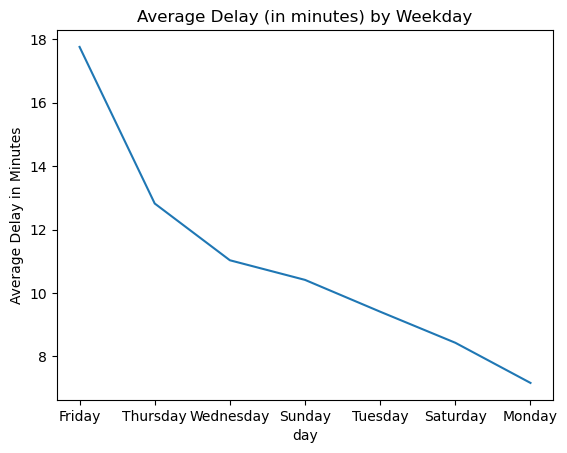

In [163]:
weekday_df.plot()
plt.title('Average Delay (in minutes) by Weekday')
plt.ylabel('Average Delay in Minutes')
plt.show()

## Does the month make a difference in the delay amount?

In [164]:
df['month']= df.index.month_name()
#make sure column was created
df.sample(5)

,delay,distance,origin,destination,hour,day,month
date,,,,,,,
2001-02-02 06:20:00,0,389,SMF,ONT,06,Friday,February
2001-02-07 17:50:00,5,237,STL,MCI,17,Wednesday,February
2001-03-30 18:47:00,78,682,BWI,BHM,18,Friday,March
2001-02-09 17:50:00,35,1588,BNA,LAS,17,Friday,February
2001-02-03 07:45:00,0,333,SJC,ONT,07,Saturday,February


In [165]:
monthly_df= df.groupby('month').delay.mean()
monthly_df

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64

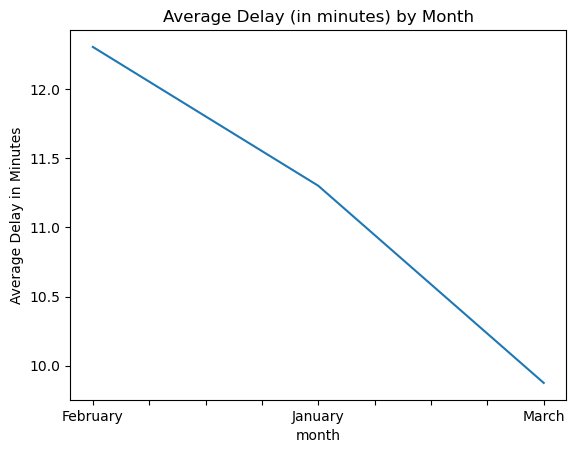

In [166]:
monthly_df.plot()
plt.title('Average Delay (in minutes) by Month')
plt.ylabel('Average Delay in Minutes')
plt.show()